In [1]:
#DATA MANIPULATING
import numpy as np
import pandas as pd

#VISUALIZATION TOOLS
import matplotlib.pyplot as plt
import seaborn as sns

#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

#IMPORT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Understanding the data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Churn_prediction/Data/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data dictionary
1. CustomerId: Client number. Unique identifier for the customer holding the account. Categorical nominal.
2. Surname: Name of the customer.
3. CreditScore: Credit Score
4. Gender: Demographic variable - M=Male, F=Female. Categorical nominal.
5. Age: Age
6. Tenure:
7. Balance:
8. NumOfProducts:
9. HasCrCard:
10. IsActiveMember:
11. EstimatedSalary:
12. Exited:

Looking at some descriptive statistics.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


From the information presented above, several inquiries remain:

- Is it possible to access balance information over a timeframe rather than a single date? Notably, there are instances of customers who have left but still maintain an account balance. This scenario prompts further investigation:

- What could this situation imply? Could these customers have terminated specific products while retaining their bank affiliation?
The term "active member" is used, but its definition and potential degrees of activity require clarification. Would it be more informative to present transaction counts, encompassing both deposits and withdrawals?

- Exploring a detailed breakdown of products acquired by individual customers could yield more comprehensive insights than merely listing product counts.

- In this exercise, we are proceeding with modeling without the full context. However, it is worth noting that typically, having a deeper understanding of the data extraction process can provide enhanced insights and potentially lead to more contextualized modeling results.

# Split the data into train and test sets

- To begin with, I will partition the data into training and testing sets.
The test set is intended to comprise data that the model has not previously encountered.

- I will conduct Exploratory Data Analysis (EDA) primarily on the training set to prevent any data leakage, obtain a realistic representation, and accurately assess the model's performance with entirely new, unseen data.

- To achieve this, I will utilize the "stratify=y" parameter, ensuring that the "train_test_split" function maintains a consistent distribution of each target class in both the training and testing sets. This becomes especially valuable when dealing with imbalanced datasets, as is the case here, given that there are more existing customers than attrited ones.

In [9]:
X = df.drop(columns=['Exited'])
y = df['Exited'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8000, 10).
Train target dataset shape: (8000,).
Test predictor dataset shape: (2000, 10).
Test target dataset shape: (2000,).


In [11]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
0    0.79625
1    0.20375
Name: Exited, dtype: float64

Test target proportion: 
0    0.7965
1    0.2035
Name: Exited, dtype: float64


# Exploratory data analysis

In [12]:
train = pd.concat([X_train, y_train], axis=1)

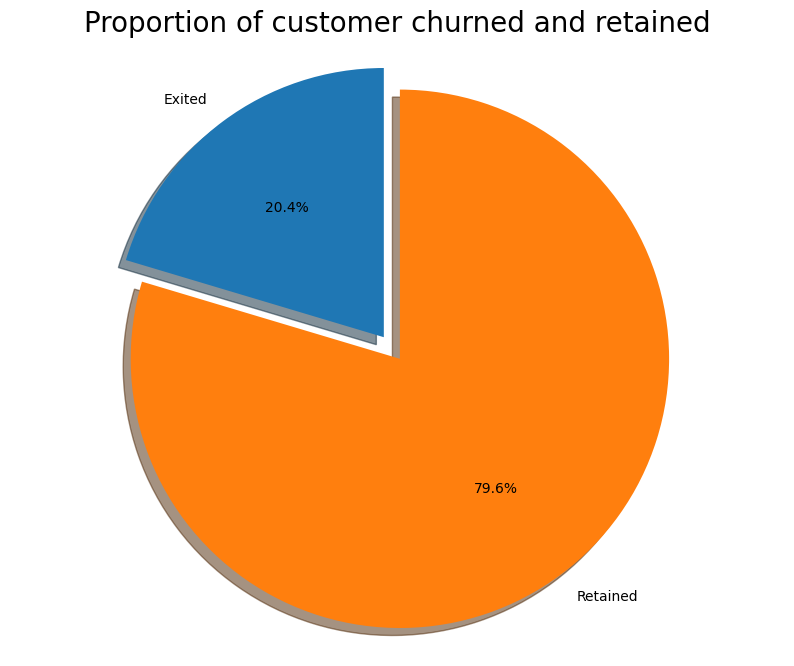

In [13]:
labels = 'Exited', 'Retained'
sizes = [train.Exited[df['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Approximately 20% of the customers have experienced churn. Consequently, a plausible baseline model might involve predicting that 20% of customers will churn. Given that 20% represents a relatively small portion, it becomes imperative to ensure that the selected model excels at accurately identifying this 20%, as it is of significant interest to the bank to pinpoint and retain this group, even at the potential expense of accurately predicting the customers who will remain with the bank.

<Axes: xlabel='IsActiveMember', ylabel='count'>

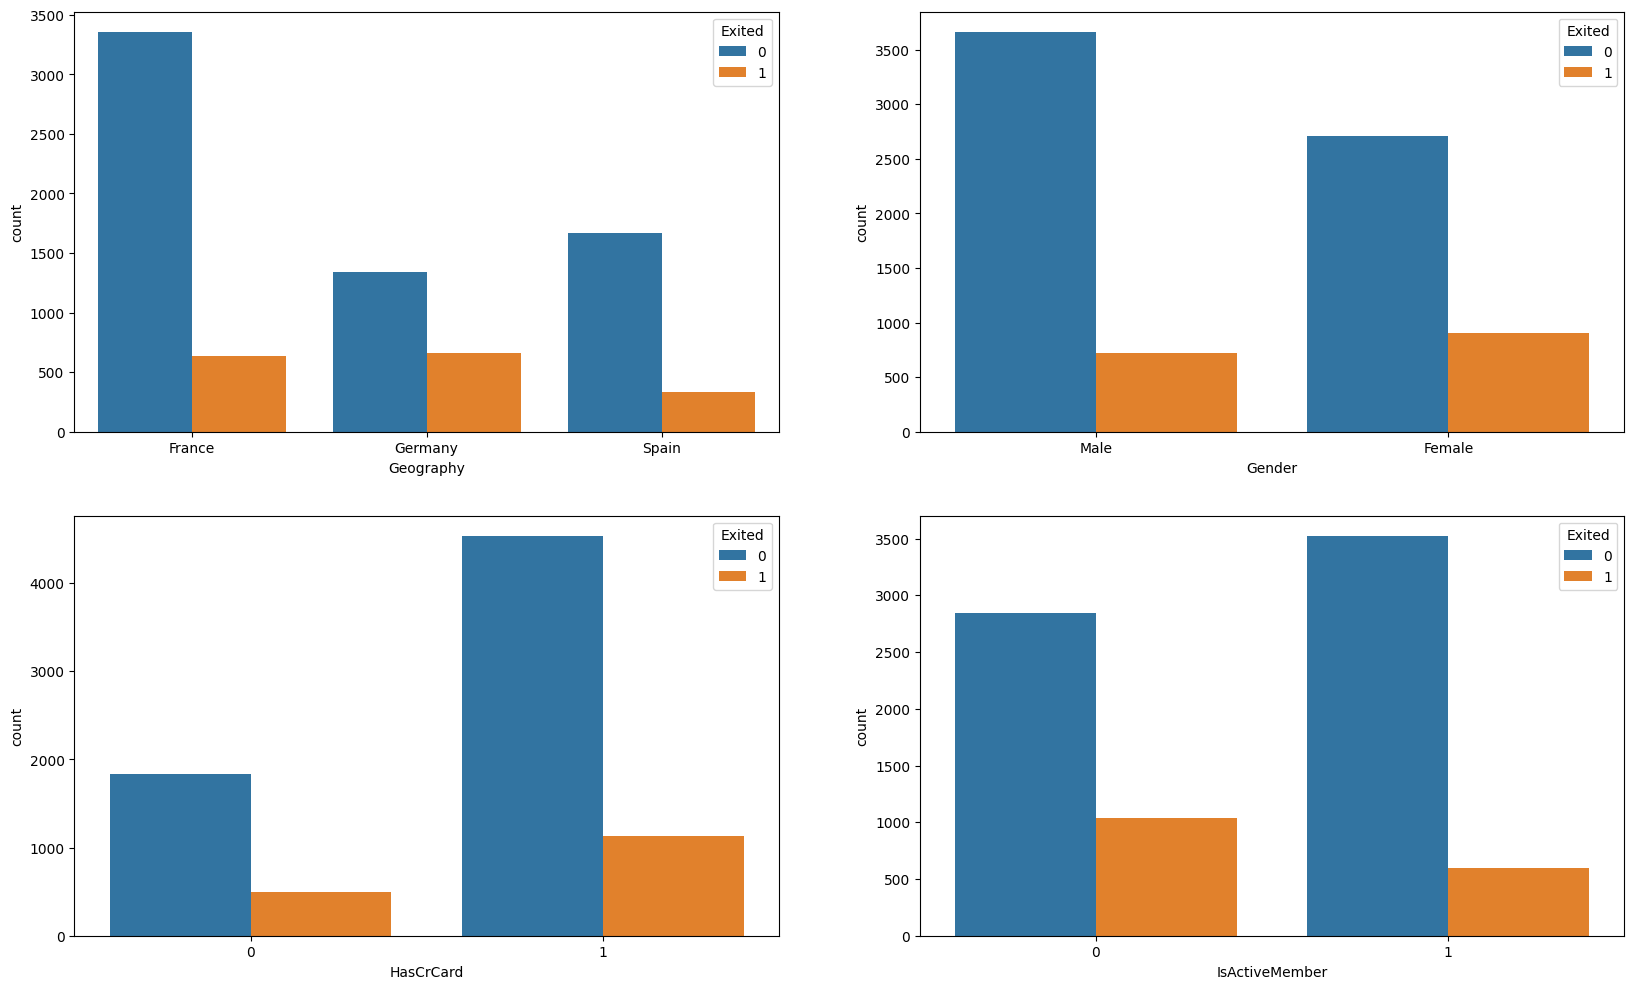

In [14]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited', data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = train, ax=axarr[1][1])

We observe the following:

- Although the majority of the data pertains to individuals from France, there exists an inverse relationship between the proportion of churned customers and the customer population in various regions. This suggests a potential issue within the bank, possibly linked to insufficient customer service resources in areas with fewer clients.

- The percentage of female customers experiencing churn is notably higher than that of male customers.

- Interestingly, a significant portion of the customers who churned held credit cards. However, given that the majority of customers have credit cards, this correlation could be coincidental.

- As expected, inactive members exhibit a higher churn rate. Concerningly, the overall proportion of inactive members is quite substantial, indicating a potential need for implementing a program aimed at converting this group into active customers. Such an initiative could significantly reduce customer churn.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

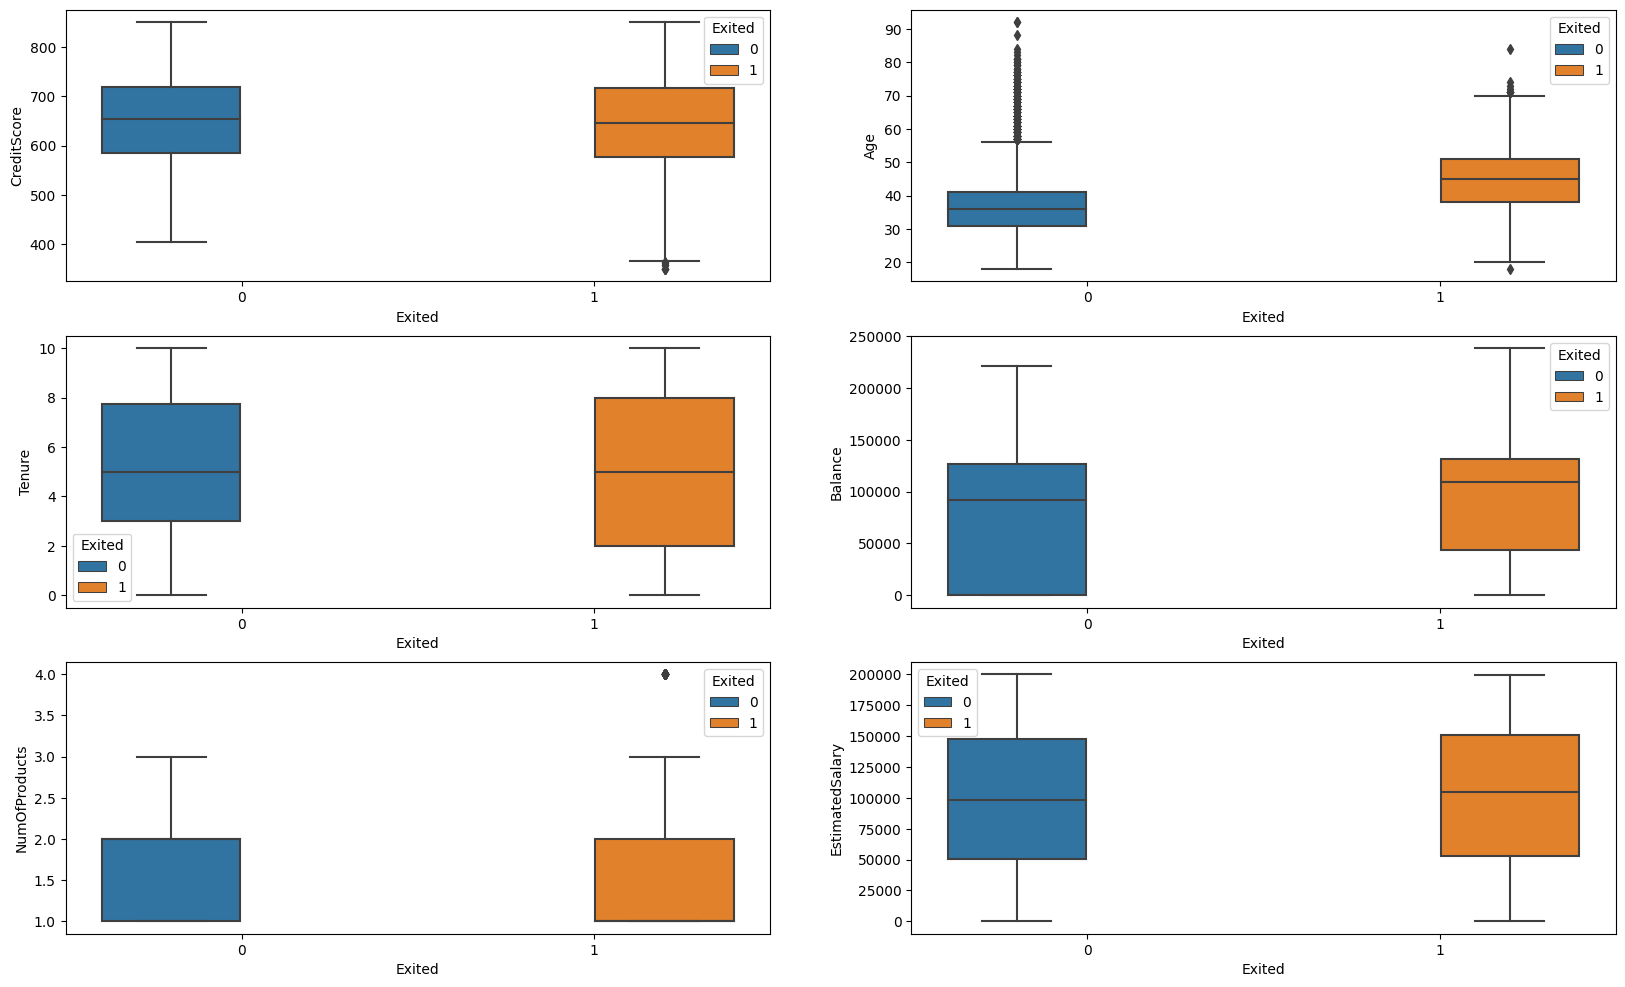

In [15]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = train, ax=axarr[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = train, ax=axarr[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = train, ax=axarr[2][1])

We observe the following:

- There is no notable disparity in the distribution of credit scores between customers who have been retained and those who have churned.

- Older customers are churning at a higher rate than their younger counterparts, indicating potential differences in service preferences across age categories. This suggests that the bank may need to reassess its target market or revise its retention strategies for distinct age groups.

- In terms of tenure, customers at both ends of the spectrum (those with minimal and extensive tenure) are more prone to churn compared to those with an average tenure.

- Alarmingly, the bank is experiencing customer attrition among those with substantial account balances, which could impact the bank's available capital for lending.

- Neither the choice of product nor salary level appears to significantly influence the likelihood of churn.